In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allison.regression import LinearRegression
from allison.utils.functions.loss import mean_squared_error
from allison.utils.metrics import r2_score
from allison.utils.data import train_test_split

In [3]:
n = 1000
x=np.linspace(2,20,n)
y=2*x + 1 + 2*np.sin(x) + np.random.randn(n)

data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,2.000000,6.915317
1,2.018018,7.210031
2,2.036036,7.198830
3,2.054054,6.930278
4,2.072072,3.556284


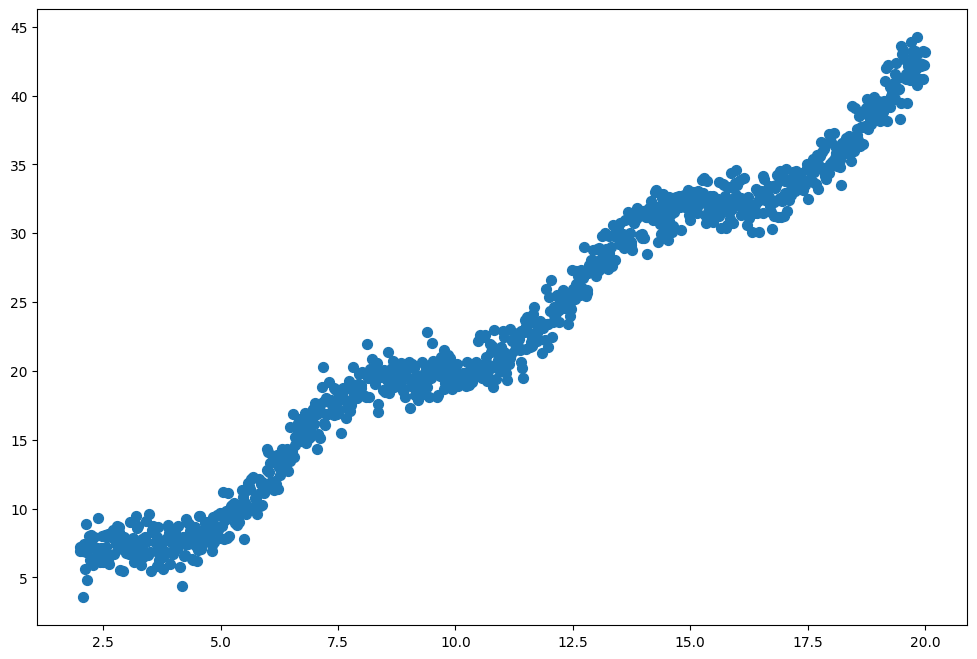

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(data['x'],data['y'],s=50)

In [5]:
X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [6]:
model=LinearRegression(loss_function=mean_squared_error,
                      metric=r2_score,
                      lr = 0.001)

model.train(X_train, y_train,n_iters=20, history_train=True)

Iter:	2	==================================================>	 mean_squared_error: 722.437% 	 r2_score: -141214.84% 

Iter:	4	==================================================>	 mean_squared_error: 234.086% 	 r2_score: -1215.02% 

Iter:	6	==================================================>	 mean_squared_error: 76.782% 	 r2_score: -55.54% 

Iter:	8	==================================================>	 mean_squared_error: 26.293% 	 r2_score: 64.64% 

Iter:	10	==================================================>	 mean_squared_error: 10.191% 	 r2_score: 88.78% 

Iter:	12	==================================================>	 mean_squared_error: 5.115% 	 r2_score: 94.93% 

Iter:	14	==================================================>	 mean_squared_error: 3.549% 	 r2_score: 96.68% 

Iter:	16	==================================================>	 mean_squared_error: 3.086% 	 r2_score: 97.21% 

Iter:	18	==================================================>	 mean_squared_error: 2.960% 	 r2_score: 97.37% 

In [7]:
history = model.history_train
history

{'iter': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'loss': [np.float64(722.4369607819291),
  np.float64(234.08611885464634),
  np.float64(76.78228246582681),
  np.float64(26.293225708546515),
  np.float64(10.191125756655344),
  np.float64(5.114953296491424),
  np.float64(3.5488379528412786),
  np.float64(3.0855937380856475),
  np.float64(2.960466684123643),
  np.float64(2.9340727608690367)],
 'precision': [np.float64(-1412.1484244314265),
  np.float64(-12.150174233425316),
  np.float64(-0.5554174598566812),
  np.float64(0.6463643161008159),
  np.float64(0.8878132413271712),
  np.float64(0.9493355430702382),
  np.float64(0.9668180269426186),
  np.float64(0.9720602251445497),
  np.float64(0.9736720200574025),
  np.float64(0.9741710290971751)],
 'params': [{'bias': array([0.]), 'weights': array([-0.85131227])},
  {'bias': array([0.11350783]), 'weights': array([0.40182443])},
  {'bias': array([0.17807871]), 'weights': array([1.11469272])},
  {'bias': array([0.21481096]), 'weights': array([1.5

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']

    a = model.weights[0]
    b = model.bias[0]

    ax.scatter(X_train, y_train, s=50)
    if i > 0:
        ax.plot(X_train, model.predict(X_train), lw=3, c='red',label=f'Predicted y = {a:.2f}x + {b:.2f}, loss = {history["loss"][i-1]:.2f}, r2 = {history["precision"][i-1]:.2f}%')
    else:
        ax.plot(X_train, model.predict(X_train), lw=3, c='red', label=f'Predicted y = {a:.2f}x + {b:.2f}')
    ax.legend()



# Create the animation
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False,interval=1000)

plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())

In [9]:
r2_score =model.evaluate(X_test, y_test)
r2_score

np.float64(0.9703435842735091)

Text(0.5, 1.0, 'Linear Regression on Test Data(Accuracy:0.97%)')

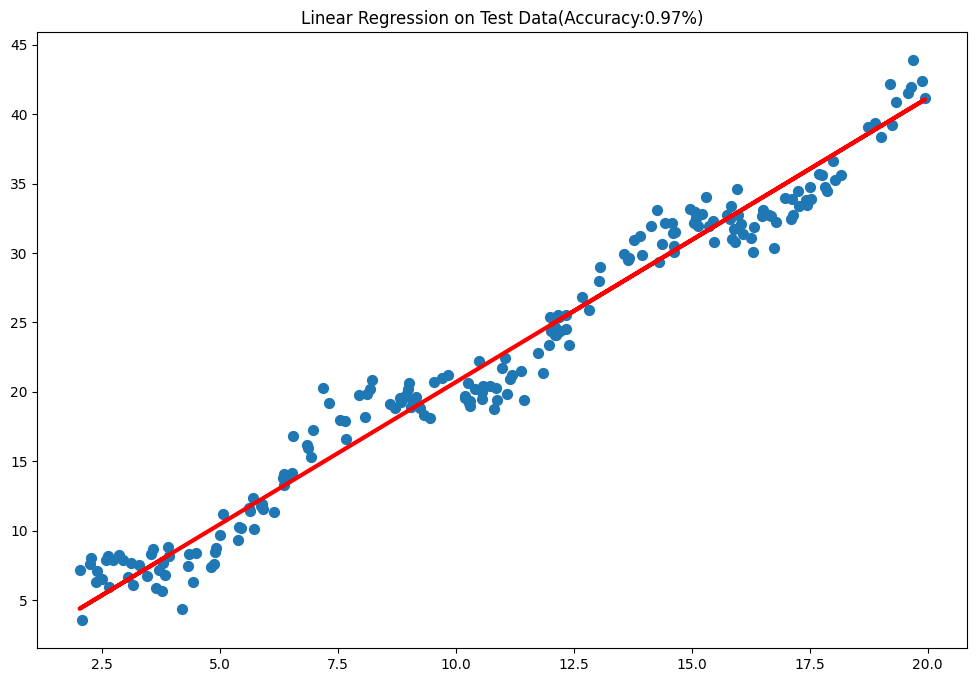

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.plot(X_test,model.predict(X_test), lw=3, c='red')
plt.title(f'Linear Regression on Test Data(Accuracy:{r2_score:.2f}%)')